# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [12]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

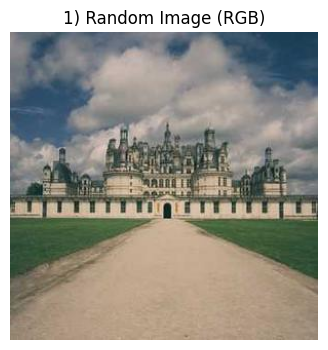

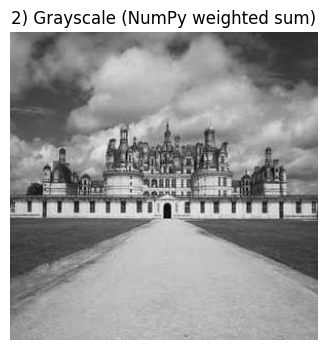

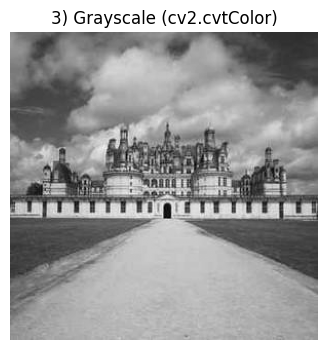

Max absolute difference between NumPy gray and cv2 gray: 1
Mean absolute difference: 0.5191222222222223

Array shapes:
  RGB image shape:     (300, 300, 3)
  Gray (NumPy) shape:  (300, 300)
  Gray (cv2) shape:    (300, 300)

Sample pixel values:
 Pixel at (y=0, x=0):
   RGB         : (135, 129, 129)
   Gray (NumPy): 130
   Gray (cv2)  : 131
 Pixel at (y=50, x=50):
   RGB         : (55, 83, 105)
   Gray (NumPy): 77
   Gray (cv2)  : 77
 Pixel at (y=100, x=100):
   RGB         : (185, 174, 170)
   Gray (NumPy): 176
   Gray (cv2)  : 177


"\nExplanation & observations:\n\n1) Channel shapes:\n   - RGB image has shape (H, W, 3). The third dimension holds three channels (R,G,B).\n   - Grayscale image has shape (H, W). When we collapse color into intensity,\n     there is only one value per pixel, so the channel dimension disappears.\n\n2) Why NumPy gray vs cv2 gray can differ slightly:\n   - My NumPy implementation used floating-point arithmetic and then rounded\n     to uint8. OpenCV's cvtColor uses an internal formula, integer arithmetic\n     and implementation-specific rounding. This produces small differences\n     (typically a few intensity units). The max/mean difference printed above\n     quantifies that.\n"

In [23]:
import cv2
import numpy as np
import requests
from io import BytesIO
from matplotlib import pyplot as plt

# 0. Fetch image from web (or replace with local load)
# I prefer working with a small, reproducible image while experimenting.
# If you want to use a local file, replace the download block with:
#    bgr_img = cv2.imread("my_image.png", cv2.IMREAD_COLOR)
url = "https://picsum.photos/300"
resp = requests.get(url)
img_array = np.frombuffer(resp.content, np.uint8)
bgr_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # OpenCV returns BGR order by default

# Quick safety check
if bgr_img is None:
    raise RuntimeError("Failed to load image. Check internet or replace with local file.")

# 1. Convert BGR -> RGB for display (matplotlib expects RGB)
# OpenCV's default is BGR. Matplotlib expects RGB, so swap channels.
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4, 4))
plt.title("1) Random Image (RGB)")
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

# 2. Convert to grayscale using NumPy (manual weighted sum)
# Weighted sum formula (standard):
#   gray = 0.299 * R + 0.587 * G + 0.114 * B
# Important: rgb_img currently has channels in [R, G, B], values 0..255.
# I convert to float in [0,1] first to avoid integer rounding in intermediate steps.
rgb_float = rgb_img.astype(np.float32) / 255.0

# split channels for clarity (R, G, B)
r = rgb_float[:, :, 0]
g = rgb_float[:, :, 1]
b = rgb_float[:, :, 2]

# compute weighted intensity, then scale back to 0..255 and convert to uint8
gray_np = 0.299 * r + 0.587 * g + 0.114 * b    # values in [0,1]
gray_np = (gray_np * 255.0).astype(np.uint8)   # uint8 grayscale image

plt.figure(figsize=(4, 4))
plt.title("2) Grayscale (NumPy weighted sum)")
plt.imshow(gray_np, cmap="gray")
plt.axis("off")
plt.show()

# 3. Convert to grayscale using OpenCV's cvtColor (for comparison)
# Note: cv2.cvtColor expects BGR input, so pass bgr_img directly.
gray_cv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Save the cv2 grayscale result (handy for turning in or inspection)
cv2.imwrite("gray_img.png", gray_cv)

plt.figure(figsize=(4, 4))
plt.title("3) Grayscale (cv2.cvtColor)")
plt.imshow(gray_cv, cmap="gray")
plt.axis("off")
plt.show()

# Quick numeric comparison between the two grayscale images
# Use absolute difference to see how close they are
diff = cv2.absdiff(gray_np, gray_cv)
print("Max absolute difference between NumPy gray and cv2 gray:", int(diff.max()))
print("Mean absolute difference:", float(diff.mean()))

# 4. Print the array shapes of RGB and Grayscale images
print("\nArray shapes:")
print("  RGB image shape:    ", rgb_img.shape)   # expected (H, W, 3)
print("  Gray (NumPy) shape: ", gray_np.shape)    # expected (H, W)
print("  Gray (cv2) shape:   ", gray_cv.shape)    # expected (H, W)

# 5. Print a few pixel values (for manual verification)
#    choose a few coordinates that likely exist in a 300x300 sample
sample_coords = [(0, 0), (50, 50), (100, 100)]

print("\nSample pixel values:")
for (y, x) in sample_coords:
    if y < rgb_img.shape[0] and x < rgb_img.shape[1]:
        rgb_val = rgb_img[y, x]                 # [R, G, B]
        gray_np_val = int(gray_np[y, x])
        gray_cv_val = int(gray_cv[y, x])
        print(f" Pixel at (y={y}, x={x}):")
        print("   RGB         :", tuple(int(v) for v in rgb_val))
        print("   Gray (NumPy):", gray_np_val)
        print("   Gray (cv2)  :", gray_cv_val)
    else:
        print(f" Coordinate (y={y}, x={x}) is outside the image bounds.")

# Short explanation
"""
Explanation & observations:

1) Channel shapes:
   - RGB image has shape (H, W, 3). The third dimension holds three channels (R,G,B).
   - Grayscale image has shape (H, W). When we collapse color into intensity,
     there is only one value per pixel, so the channel dimension disappears.

2) Why NumPy gray vs cv2 gray can differ slightly:
   - My NumPy implementation used floating-point arithmetic and then rounded
     to uint8. OpenCV's cvtColor uses an internal formula, integer arithmetic
     and implementation-specific rounding. This produces small differences
     (typically a few intensity units). The max/mean difference printed above
     quantifies that.
"""

RGB has 3 channels as each pixel stores 3 values(each one for red, green and blue), but Grayscale images need only one channel because we store only 1 value per pixel denotiing intensity of black color

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [14]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

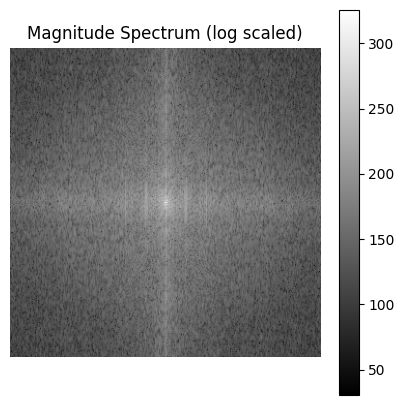

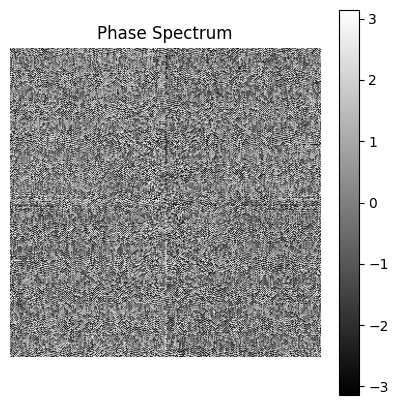

In [32]:
# Part B — FFT of grayscale image, magnitude + phase

# B1. Load grayscale image (saved earlier in Part A)
# The FFT should be applied on the grayscale intensity image.
# I load the file produced earlier ("gray_img.png").
gray = cv2.imread("gray_img.png", cv2.IMREAD_GRAYSCALE)

# Quick sanity check
if gray is None:
    raise RuntimeError("Could not load gray_img.png — make sure Part A saved it.")

# B1. Compute FFT using NumPy

# Step 1: Compute the 2D FFT.
# fft2 gives a complex-valued frequency-domain representation.
f = np.fft.fft2(gray)

# Step 2: Shift zero frequency to the center for visualization.
# Normally, DC component appears at the top-left; fftshift moves it to the center.
fshift = np.fft.fftshift(f)

# (Store fshift as required)
# fshift now contains centered frequency domain data.


# B2. Compute magnitude, phase & visualize magnitude spectrum

# Step 1: Compute magnitude and phase of the complex FFT output.
# Magnitude tells us how strong each frequency is.
# Phase tells us how those frequencies are aligned in the spatial domain.
magnitude = np.abs(fshift)
phase = np.angle(fshift)

# Step 2: Create a magnitude spectrum for display.
# Frequency magnitudes vary by several orders of magnitude,
# so applying log compression helps reveal details.
magnitude_spectrum = 20 * np.log(magnitude + 1)   # +1 avoids log(0)


# Display results

# Magnitude spectrum
plt.figure(figsize=(5, 5))
plt.title("Magnitude Spectrum (log scaled)")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.colorbar()
plt.axis("off")
plt.show()

# Phase spectrum visualization
# Note: Phase images often appear noisy because phase jumps quickly.
plt.figure(figsize=(5, 5))
plt.title("Phase Spectrum")
plt.imshow(phase, cmap="gray")
plt.colorbar()
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [16]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

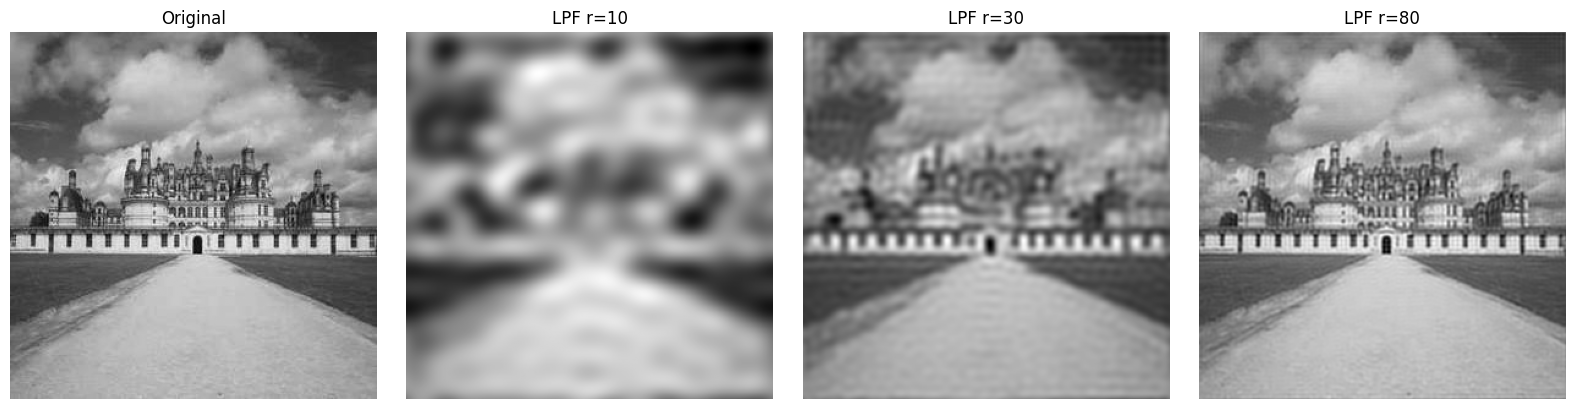

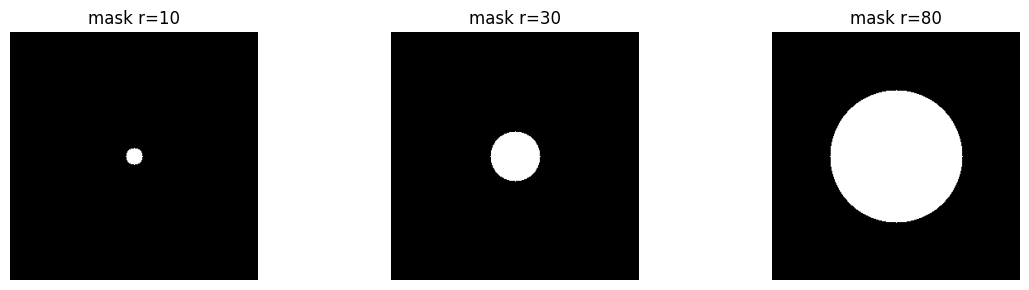

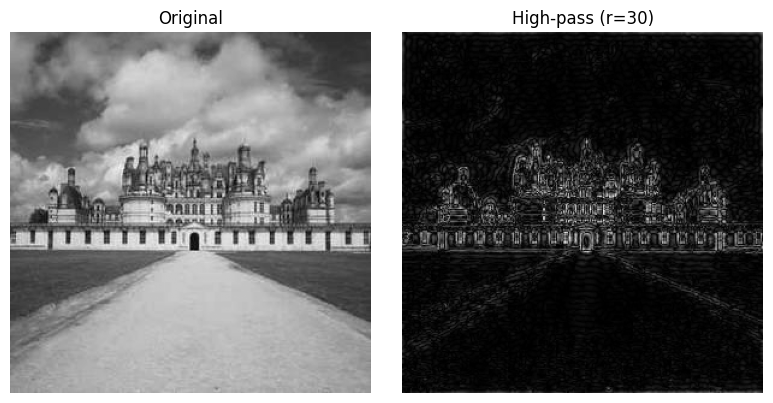

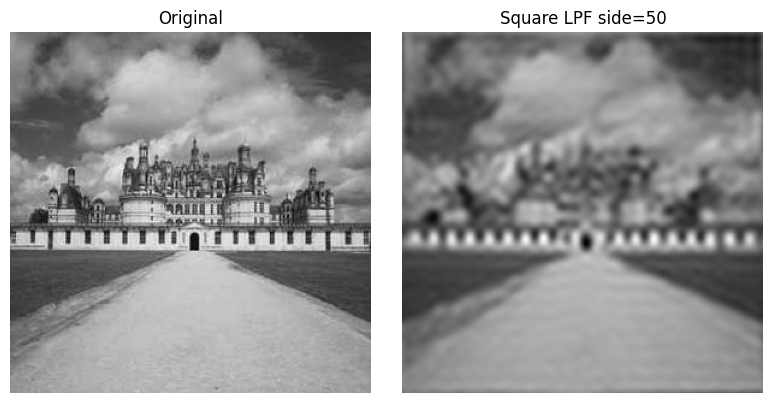

In [33]:
# ensure we have a grayscale image called `gray`
# if not, load it (the script from Part A saved "gray_img.png")
if 'gray' not in globals():
    gray = cv2.imread("gray_img.png", cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise RuntimeError("gray image not found. Run Part A or place gray_img.png here.")

# compute centered FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

def normalize_for_display(x):
    x = np.abs(x)
    x = x - x.min()
    if x.max() != 0:
        x = x / x.max()
    return (x * 255).astype(np.uint8)

# scale radii to image size so effects remain similar on different resolutions
scale = min(rows, cols) / 300.0
radii = [int(round(r * scale)) for r in (10, 30, 80)]

# C1: circular low-pass filters with radii 10, 30, 80 (scaled)
lpf_results = []
for r in radii:
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, (ccol, crow), r, 1, -1)   # pass band is 1 inside circle

    fshift_lpf = fshift * mask                 # zero out high freqs
    f_ishift = np.fft.ifftshift(fshift_lpf)
    img_back = np.fft.ifft2(f_ishift)
    img_back_disp = normalize_for_display(img_back)

    # smaller r -> fewer high-frequency components pass -> stronger blur
    lpf_results.append((r, mask, img_back_disp))

# show original and LPF outputs
fig, axes = plt.subplots(1, len(lpf_results) + 1, figsize=(4 * (len(lpf_results) + 1), 4))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

for i, (r, _, img_back_disp) in enumerate(lpf_results, start=1):
    axes[i].imshow(img_back_disp, cmap='gray')
    axes[i].set_title(f"LPF r={r}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# show the masks so it's clear what we're multiplying by
fig, axes = plt.subplots(1, len(radii), figsize=(4 * len(radii), 3))
for i, (r, mask, _) in enumerate(lpf_results):
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f"mask r={r}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# C2: high-pass filter (complement of LPF at r=30)
r_hp = int(round(30 * scale))
mask_lpf_hp = np.zeros((rows, cols), dtype=np.uint8)
cv2.circle(mask_lpf_hp, (ccol, crow), r_hp, 1, -1)
mask_hpf = 1 - mask_lpf_hp

fshift_hpf = fshift * mask_hpf
f_ishift_hp = np.fft.ifftshift(fshift_hpf)
img_hp = np.fft.ifft2(f_ishift_hp)
img_hp_disp = normalize_for_display(img_hp)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_hp_disp, cmap='gray')
plt.title(f"High-pass (r={r_hp})")
plt.axis('off')

plt.tight_layout()
plt.show()

# C3: square low-pass centered at freq center (side = 50 scaled)
side = int(round(50 * scale))
half = side // 2
mask_sq = np.zeros((rows, cols), dtype=np.uint8)
mask_sq[crow-half:crow+half, ccol-half:ccol+half] = 1

fshift_sq = fshift * mask_sq
f_ishift_sq = np.fft.ifftshift(fshift_sq)
img_sq = np.fft.ifft2(f_ishift_sq)
img_sq_disp = normalize_for_display(img_sq)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_sq_disp, cmap='gray')
plt.title(f"Square LPF side={side}")
plt.axis('off')

plt.tight_layout()
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [18]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

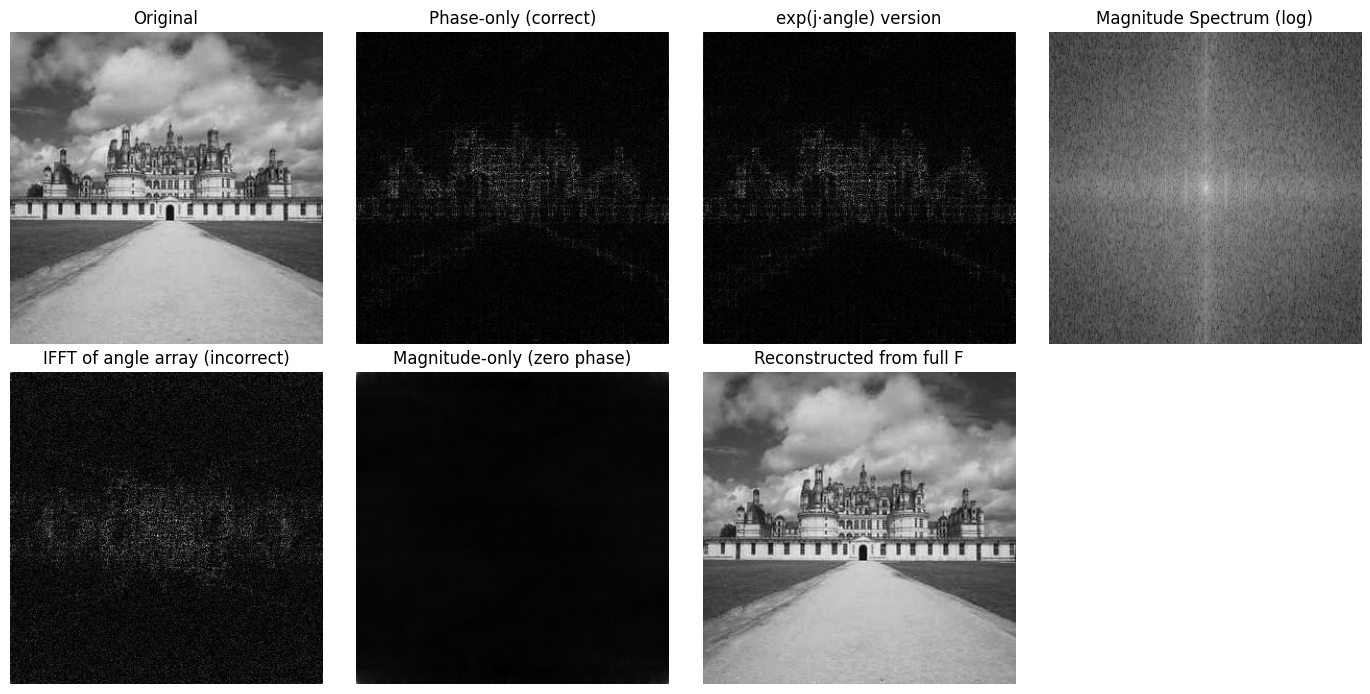

'\nPhase-only explanation:\n- phase_only = fshift / |fshift| keeps the phase information and sets all magnitudes to 1.\n  This produces valid complex phasors e^{jθ}, which inverse FFT can use.\n- np.angle(fshift) only returns the angles θ, but not as complex numbers.\n  Feeding these raw angles to ifft2 is not meaningful, which is why the\n  reconstruction looks wrong.\n\nMagnitude-only explanation:\n- Using mag_only (|F|) with zero phase loses almost all structural information,\n  because the spatial arrangement of objects is encoded mostly in the phase.\n- The magnitude spectrum shown in Part B used a logarithmic display:\n      20 * log(|F| + 1)\n  This was ONLY for visualization. The reconstruction here uses the *linear*\n  magnitude values, so the result looks completely different.\n'

In [34]:
# Load the grayscale image produced earlier
gray = cv2.imread("gray_img.png", cv2.IMREAD_GRAYSCALE)
if gray is None:
    raise FileNotFoundError("Could not load gray_img.png")

# Compute FFT and shift the zero frequency component to the center
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

# Small helper to display images nicely
def show_gray(img, title, ax=None):
    img_disp = np.abs(img)
    img_disp = img_disp - img_disp.min()
    if img_disp.max() != 0:
        img_disp = img_disp / img_disp.max()
    img_disp = (img_disp * 255).astype(np.uint8)
    if ax is None:
        plt.figure(figsize=(4,4))
        plt.imshow(img_disp, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        ax.imshow(img_disp, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

# D1. Phase-only reconstruction
eps = 1e-12
magnitude = np.abs(fshift)
phase_angles = np.angle(fshift)

# Correct phase-only spectrum: keep only phase, force magnitude = 1
phase_only = fshift / (magnitude + eps)

# Reconstruction from phase-only
img_phase_only = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase_only = np.abs(img_phase_only)

# For comparison: build phasors from angles explicitly
phase_phasors = np.exp(1j * phase_angles)
img_phase_phasor = np.fft.ifft2(np.fft.ifftshift(phase_phasors))
img_phase_phasor = np.abs(img_phase_phasor)

# Now try the incorrect reconstruction shown in lecture:
# Using np.angle(fshift) *directly* as FFT data. This is invalid,
# because np.angle gives real values (the angles), not complex phasors.
wrong_ifft = np.fft.ifft2(np.fft.ifftshift(phase_angles))
wrong_ifft = np.abs(wrong_ifft)

# D2. Magnitude-only reconstruction
mag_only = magnitude.copy()     # |F(u,v)|

# Treat |F| as real positive values in frequency domain (zero phase assumption)
img_mag_only = np.fft.ifft2(np.fft.ifftshift(mag_only))
img_mag_only = np.abs(img_mag_only)

# Magnitude spectrum (log-scaled for display only)
mag_spec = 20 * np.log(magnitude + 1)
mag_spec_disp = mag_spec - mag_spec.min()
if mag_spec_disp.max() != 0:
    mag_spec_disp = mag_spec_disp / mag_spec_disp.max()

# Full reconstruction (sanity check)
img_full = np.fft.ifft2(np.fft.ifftshift(fshift))
img_full = np.abs(img_full)

# Display results
plt.figure(figsize=(14, 7))

plt.subplot(2, 4, 1)
show_gray(gray, "Original", ax=plt.gca())

plt.subplot(2, 4, 2)
show_gray(img_phase_only, "Phase-only (correct)", ax=plt.gca())

plt.subplot(2, 4, 3)
show_gray(img_phase_phasor, "exp(j·angle) version", ax=plt.gca())

plt.subplot(2, 4, 4)
plt.imshow(mag_spec_disp, cmap='gray')
plt.title("Magnitude Spectrum (log)")
plt.axis('off')

plt.subplot(2, 4, 5)
show_gray(wrong_ifft, "IFFT of angle array (incorrect)", ax=plt.gca())

plt.subplot(2, 4, 6)
show_gray(img_mag_only, "Magnitude-only (zero phase)", ax=plt.gca())

plt.subplot(2, 4, 7)
show_gray(img_full, "Reconstructed from full F", ax=plt.gca())

plt.tight_layout()
plt.show()

# Conclusions

"""
Phase-only explanation:
- phase_only = fshift / |fshift| keeps the phase information and sets all magnitudes to 1.
  This produces valid complex phasors e^{jθ}, which inverse FFT can use.
- np.angle(fshift) only returns the angles θ, but not as complex numbers.
  Feeding these raw angles to ifft2 is not meaningful, which is why the
  reconstruction looks wrong.

Magnitude-only explanation:
- Using mag_only (|F|) with zero phase loses almost all structural information,
  because the spatial arrangement of objects is encoded mostly in the phase.
- The magnitude spectrum shown in Part B used a logarithmic display:
      20 * log(|F| + 1)
  This was ONLY for visualization. The reconstruction here uses the *linear*
  magnitude values, so the result looks completely different.
"""


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

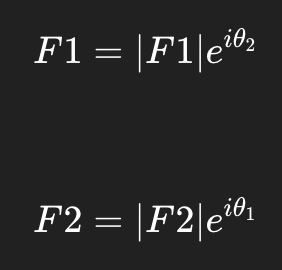

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [20]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

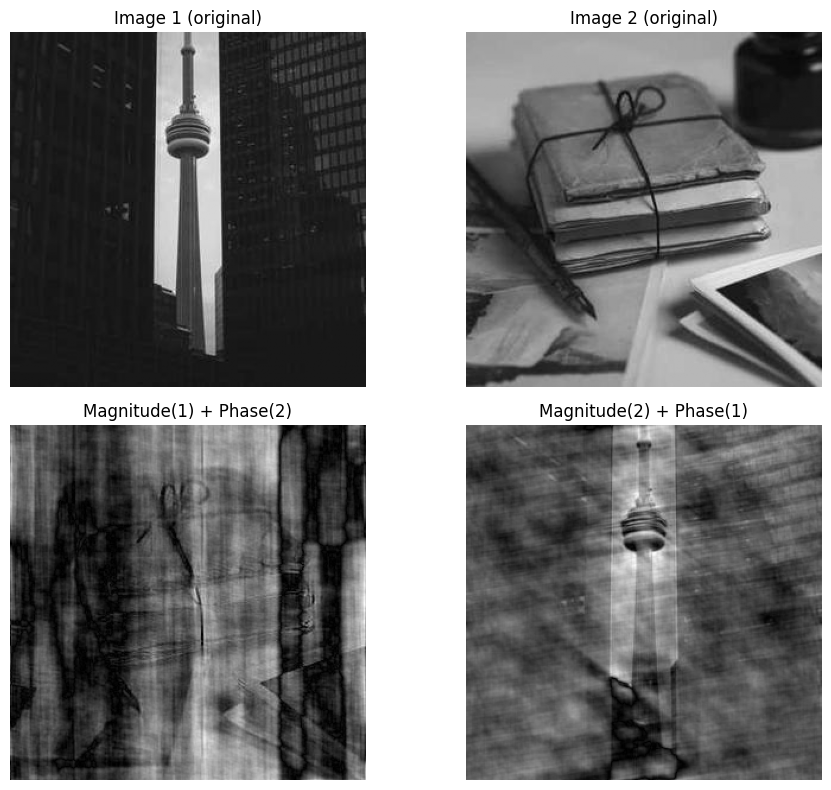

In [35]:
def load_gray_from_url(url, target_shape=None):
    resp = requests.get(url)
    img_arr = np.frombuffer(resp.content, np.uint8)
    img = cv2.imdecode(img_arr, cv2.IMREAD_GRAYSCALE)
    if target_shape is not None:
        img = cv2.resize(img, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_AREA)
    return img

# load two different random grayscale images (same size)
img1 = load_gray_from_url("https://picsum.photos/300")
img2 = load_gray_from_url("https://picsum.photos/300?random=2")
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# compute centered FFTs
F1 = np.fft.fft2(img1)
F2 = np.fft.fft2(img2)
F1s = np.fft.fftshift(F1)
F2s = np.fft.fftshift(F2)

# magnitude and phase
mag1, phase1 = np.abs(F1s), np.angle(F1s)
mag2, phase2 = np.abs(F2s), np.angle(F2s)

# swap magnitude and phase
S_mag1_phase2 = mag1 * np.exp(1j * phase2)
S_mag2_phase1 = mag2 * np.exp(1j * phase1)

def reconstruct_from_shifted(S_shifted):
    S = np.fft.ifftshift(S_shifted)
    img_back = np.fft.ifft2(S)
    return np.abs(img_back)

img_swap_1 = reconstruct_from_shifted(S_mag1_phase2)
img_swap_2 = reconstruct_from_shifted(S_mag2_phase1)

def normalize_uint8(x):
    x = x - x.min()
    if x.max() != 0:
        x = x / x.max()
    return (x * 255).astype(np.uint8)

img1_n = normalize_uint8(img1)
img2_n = normalize_uint8(img2)
swap1_n = normalize_uint8(img_swap_1)
swap2_n = normalize_uint8(img_swap_2)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img1_n, cmap='gray')
plt.title("Image 1 (original)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img2_n, cmap='gray')
plt.title("Image 2 (original)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(swap1_n, cmap='gray')
plt.title("Magnitude(1) + Phase(2)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(swap2_n, cmap='gray')
plt.title("Magnitude(2) + Phase(1)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Final observation:
# Phase encodes the image structure (shapes, edges, geometry).
# Magnitude encodes the energy / texture (contrast, fine details).
# Therefore, swapping phase moves structure while swapping magnitude changes texture.
